<a href="https://colab.research.google.com/github/andysingal/machine-learning/blob/main/Dimension_reduction_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import os, time, pickle, gzip
import datetime


# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score

'''TensorFlow'''
import tensorflow as tf


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = np.reshape(X_train, (60000,784))
X_test = np.reshape(X_test, (10000, 784))

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)


Shape of X_train:  (60000, 784)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [6]:
# Create Pandas DataFrames from the datasets
train_index = range(0,len(X_train))
test_index = range(len(X_train), len(X_train)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [9]:
# Add in plain English labels
labels_dict = {
    0: "tshirt",
    1: "pants",
    2: "sweater",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "dressshirt",
    7: "sneaker",
    8: "bag",
    9: "ankleboot",
}
    
y_train_labels = y_train.map(labels_dict)

In [7]:
# Define scatterplot function 
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

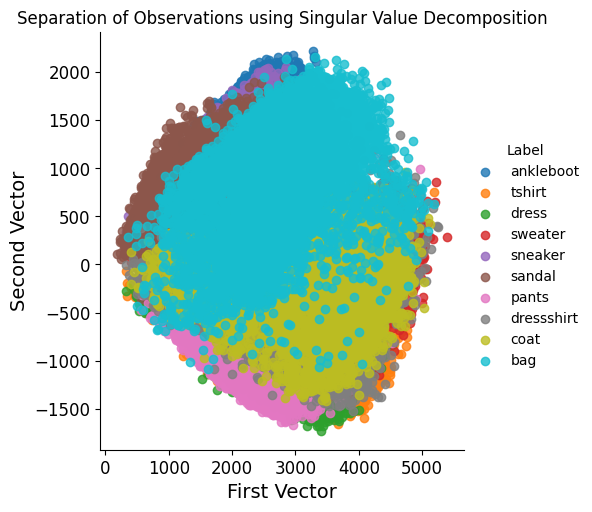

In [11]:
# Singular Value Decomposition
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, \
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

scatterPlot(X_train_svd, y_train_labels, "Singular Value Decomposition")



#Gaussian Random Projection

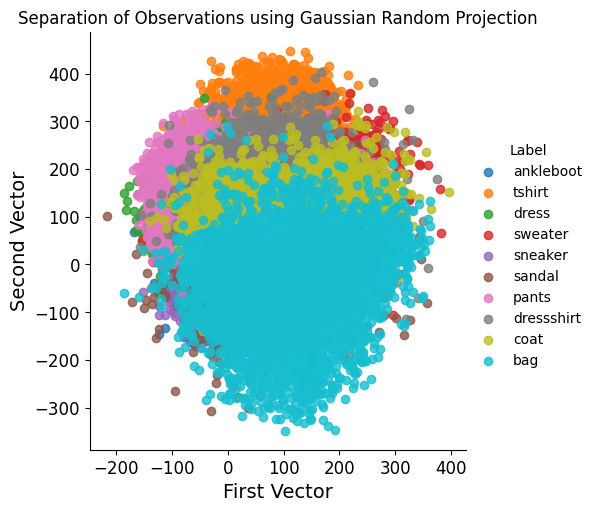

In [12]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

scatterPlot(X_train_GRP, y_train_labels, "Gaussian Random Projection")

#Isomap
Instead of linearly projecting the data from a high-dimensional space to a low-dimensional space, we can use nonlinear dimensionality reduction methods. These methods are collectively known as manifold learning.

The most vanilla form of manifold learning is known as isometric mapping, or Isomap for short. Like kernel PCA, Isomap learns a new, low-dimensional embedding of the original feature set by calculating the pairwise distances of all the points, where distance is curved or geodesic distance rather than Euclidean distance.

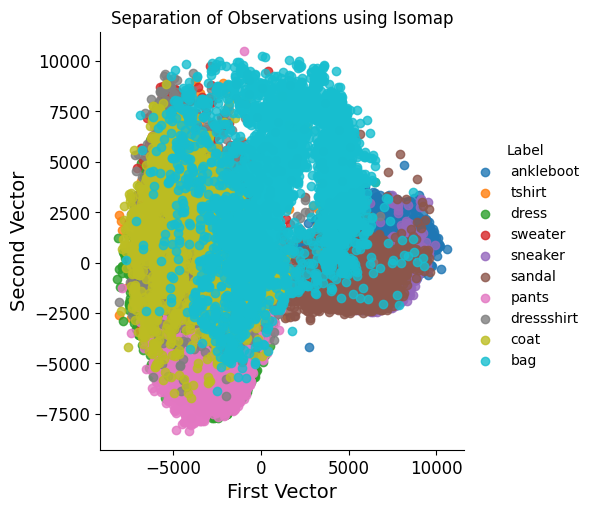

In [13]:
# Isomap

from sklearn.manifold import Isomap

n_neighbors = 5
n_components = 10
n_jobs = 4

isomap = Isomap(n_neighbors=n_neighbors, \
                n_components=n_components, n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)

scatterPlot(X_train_isomap, y_train_labels, "Isomap")

#t-Distributed Stochastic Neighbor Embedding
t-distributed stochastic neighbor embedding (t-SNE) is a nonlinear dimensionality reduction technique for visualizing high-dimensional data. t-SNE accomplishes this by modeling each high-dimensional point into a two- or three-dimensional space, where similar points are modeled close to each other and dissimilar points are modeled farther away. It does this by constructing two probability distributions, one over pairs of points in the high-dimensional space and another over pairs of points in the low-dimensional space such that similar points have a high probability and dissimilar points have a lower probability. Specifically, t-SNE minimizes the Kullback–Leibler divergence between the two probability distributions.

In [15]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

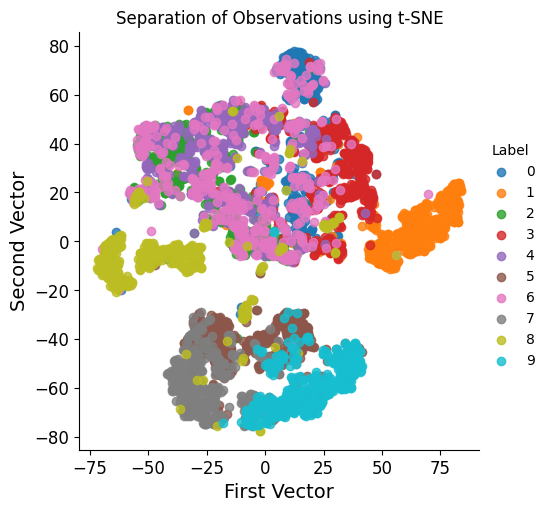

In [16]:
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, "t-SNE")

#Dictionary Learning
One such method is dictionary learning, which learns the sparse representation of the original data. The resulting matrix is known as the dictionary, and the vectors in the dictionary are known as atoms.

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(


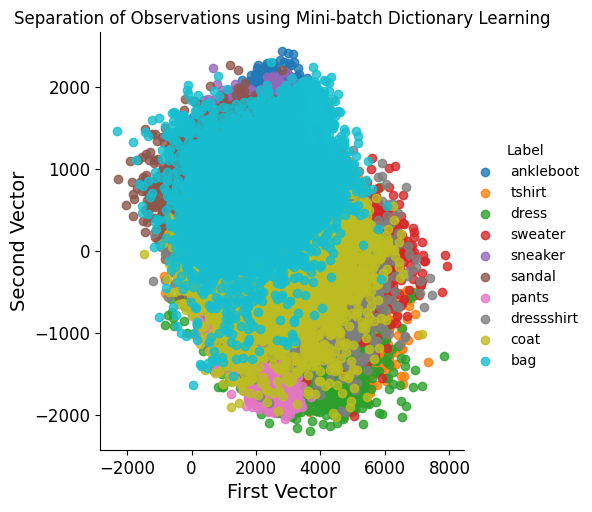

In [17]:
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50
alpha = 1
batch_size = 200
n_iter = 25
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
                        n_components=n_components, alpha=alpha, \
                        batch_size=batch_size, n_iter=n_iter, \
                        random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame( \
    data=X_train_miniBatchDictLearning, index=train_index)

scatterPlot(X_train_miniBatchDictLearning, y_train_labels, \
            "Mini-batch Dictionary Learning")

In [20]:
import datetime as dt
print("Completed: ", dt.datetime.now())

Completed:  2023-04-19 17:03:39.250611
